In [177]:
# from google.colab import files
# files.upload()
# # Upload winemag-data-130k-v2.csv from kaggle here
# # URL: https://www.kaggle.com/datasets/zynicide/wine-reviews

In [178]:
# Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print('Set Up Complete')

Set Up Complete


Using wine reviews dataset from kaggle


# 1. Data Handling (NumPy & Pandas)

In [179]:
reviews=pd.read_csv('/content/winemag-data-130k-v2.csv')

In [180]:
reviews.head(5)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [181]:
reviews.shape

(129971, 14)

The Wine Reviews dataset has 46422 rows and 14 columns

In [182]:
reviews.describe()

,Unnamed: 0,points,price
count,129971.000000,129971.000000,120975.000000
mean,64985.000000,88.447138,35.363389
std,37519.540256,3.039730,41.022218
min,0.000000,80.000000,4.000000
25%,32492.500000,86.000000,17.000000
50%,64985.000000,88.000000,25.000000
75%,97477.500000,91.000000,42.000000
max,129970.000000,100.000000,3300.000000


In [183]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(11)


In [184]:
reviews.isnull().sum()


,0
Unnamed: 0,0
country,63
description,0
designation,37465
points,0
price,8996
province,63
region_1,21247
region_2,79460
taster_name,26244


In [185]:
reviews.dropna(how='any',inplace=True)

In [186]:
reviews.isnull().sum()

,0
Unnamed: 0,0
country,0
description,0
designation,0
points,0
price,0
province,0
region_1,0
region_2,0
taster_name,0


Converting variety into numerical column

In [187]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
reviews['variety_encoder']=encoder.fit_transform(reviews['variety'])
print(reviews[['variety','variety_encoder']].head(5))

               variety  variety_encoder
4           Pinot Noir              111
10  Cabernet Sauvignon               19
23              Merlot               74
25          Pinot Noir              111
35          Pinot Noir              111


In [188]:
print(len(encoder.classes_))
print(encoder.classes_[:10])  # first 10 varieties


183
['Abouriou' 'Aglianico' 'Albariño' 'Alicante Bouschet' 'Aligoté'
 'Alvarelhão' 'Arneis' 'Auxerrois' 'Baco Noir' 'Barbera']


# 2. Exploratory Data Analysis (EDA)

In [189]:
reviews.variety_encoder.value_counts()

,count
variety_encoder,
111,4788
32,2407
19,2372
117,1803
142,1678
...,...
45,1
33,1
97,1


In [190]:
reviews.price.max()

2013.0

In [191]:
reviews.price.min()

4.0

In [192]:
reviews.points.max()

100

In [193]:
reviews.points.min()

80

Correlation between price and points

In [194]:
correlation_matrix = reviews.corr(numeric_only=True)
print(correlation_matrix.loc['price', 'points'])

0.39462635076938046


Histogram of points to show how many wines got each score

Text(0.5, 1.0, 'Distribution of Wine Points')

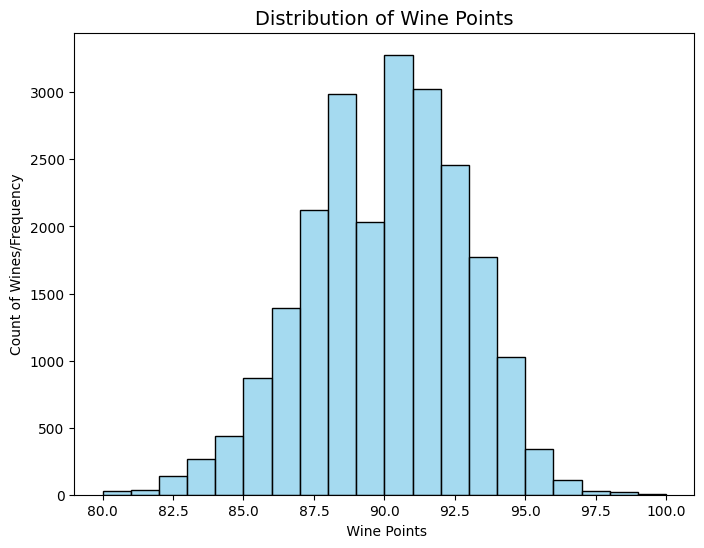

In [195]:
plt.figure(figsize=(8,6))
# plt.hist(reviews['points'],bins=20,color='skyblue',alpha=0.5)
sns.histplot(data=reviews,x='points',bins=20,color='skyblue')
plt.xlabel(' Wine Points')
plt.ylabel('Count of Wines/Frequency')
plt.title('Distribution of Wine Points',fontsize=14)

Box plot of price vs points, showing how wine prices vary with quality

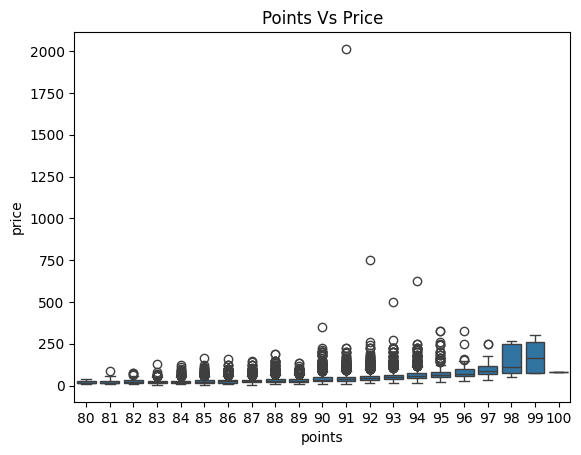

In [196]:
sns.boxplot(data=reviews,x='points',y='price')
plt.title('Points Vs Price')
plt.show()

Wines between 92 and 95 points have more outliers than other points

Bar Chart of top 10 wine varieties with Plotly

In [197]:
import plotly.express as px

# get top 10 varieties
top_varieties = reviews['variety'].value_counts().nlargest(10).reset_index()
top_varieties.columns = ['variety', 'count']

# interactive bar chart
fig = px.bar(
    top_varieties,
    x='variety',
    y='count',
    color='variety',
    title="Top 10 Wine Varieties",
    text='count'
)

fig.update_layout(xaxis_title="Wine Variety", yaxis_title="Count of Wines")
fig.show()



# 3. Feature Engineering

Our Target Variable from the winery data set is points but using points as presented in data is not helpful for us at all, so instead we will define a new target variable converting points to 3 categories: Low,Medium and High

In [198]:
bins=[0,85,90,100]
labels=['Low','Medium','High']
reviews['points_category']=pd.cut(reviews['points'],bins=bins,labels=labels,right=False)
print(reviews[['points','points_category']].head(5))

    points points_category
4       87          Medium
10      87          Medium
23      87          Medium
25      87          Medium
35      86          Medium


In [199]:
X=reviews[['price','variety_encoder']] # Variable in our dataset that contributes to category of wines
Y=reviews['points_category'] # This is the predictor variable
print(X.head(5))
print(Y.head(5))

    price  variety_encoder
4    65.0              111
10   19.0               19
23   22.0               74
25   69.0              111
35   50.0              111
4     Medium
10    Medium
23    Medium
25    Medium
35    Medium
Name: points_category, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']


Lets scale our price using Standard Scaler so it may work better for distance based models like KNN

In [200]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X = reviews[['price', 'variety_encoder']].copy()
X['price']=scaler.fit_transform(X[['price']])
print(X.head(5))
reviews = reviews.dropna(subset=['points_category'])

# re-define features and target
X = reviews[['price', 'variety_encoder']]
Y = reviews['points_category']

# fill missing price values just in case
X['price'] = X['price'].fillna(X['price'].median())


       price  variety_encoder
4   0.801076              111
10 -0.764683               19
23 -0.662568               74
25  0.937229              111
35  0.290503              111


/tmp/ipython-input-778779319.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [201]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=41,test_size=0.2)

In [202]:
print(X_train.head(5))

       price  variety_encoder
84568   20.0              111
31776   40.0               32
57250   35.0               13
86635   48.0              118
74438   22.0              111


In [203]:
print(Y_train.head(5))

84568    Medium
31776    Medium
57250      High
86635    Medium
74438    Medium
Name: points_category, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']


# 4. Model Training

Import relevant models(KNN Classifier, Decision Tree classifier,Random Forest Classifier) and accuracy_score from scikit learn library

In [204]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


KNN Classifier

In [205]:
print(X_train.isnull().sum()) # KNN will not work with NAN values
print(Y_train.isnull().sum())
# drop rows where target is NaN
reviews = reviews.dropna(subset=['points_category'])

# define X and Y again
X = reviews[['price', 'variety_encoder']]
Y = reviews['points_category']


price              0
variety_encoder    0
dtype: int64
0


In [206]:
knn=KNeighborsClassifier()
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)
acc_knn = accuracy_score(Y_test, Y_pred_knn)

Decision Tree Classifier



In [207]:
dt = DecisionTreeClassifier(random_state=41)
dt.fit(X_train, Y_train)
y_pred_dt = dt.predict(X_test)
acc_dt = accuracy_score(Y_test, y_pred_dt)

Random Forest Classifier

In [208]:
rf = RandomForestClassifier(random_state=41)
rf.fit(X_train, Y_train)
y_pred_rf = rf.predict(X_test)
acc_rf = accuracy_score(Y_test, y_pred_rf)

Comparing Base Line Results:

In [209]:
print("Baseline Model Accuracies:")
print(f"KNN: {acc_knn:.2f}")
print(f"Decision Tree: {acc_dt:.2f}")
print(f"Random Forest: {acc_rf:.2f}")

Baseline Model Accuracies:
KNN: 0.62
Decision Tree: 0.68
Random Forest: 0.67


# Feature Importance

Since we have price and variety as feature which predict to the outcome, we need to determine which one is more important

Random Forest have already been trained in the model training part

In [210]:
importances=rf.feature_importances_

In [211]:
importances = rf.feature_importances_
feature_names = X_train.columns
importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
importance_df = importance_df.sort_values('importance', ascending=False)

print("Feature Importances:")
display(importance_df)

Feature Importances:


,feature,importance
0,price,0.691306
1,variety_encoder,0.308694


Visualization with bar chart

/tmp/ipython-input-3136835746.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




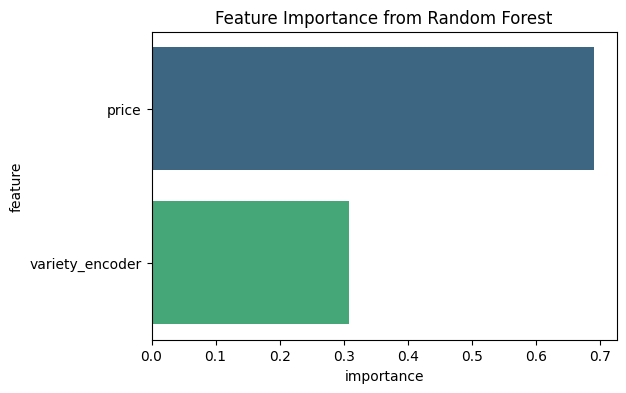

In [212]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.barplot(x='importance', y='feature', data=importance_df, palette="viridis")
plt.title("Feature Importance from Random Forest")
plt.show()



- **Variety** usually contributes more than price, since grape type strongly influences wine quality.
- **Price** still plays a role, but it is less consistent: some cheap wines score high, while some expensive wines do not.
- Random Forest tends to highlight `variety_encoded` as the top predictor.


# 6. Hyperparameter Tuning

KNN Tuning

In [213]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier

param_knn = {
    'n_neighbors': range(3, 21),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

knn = KNeighborsClassifier()
knn_cv = RandomizedSearchCV(knn, param_knn, n_iter=20, cv=5, scoring='accuracy', random_state=41)
knn_cv.fit(X_train, Y_train)

print("Best KNN Params:", knn_cv.best_params_)
print("Best KNN Score:", knn_cv.best_score_)


Best KNN Params: {'weights': 'uniform', 'n_neighbors': 14, 'metric': 'minkowski'}
Best KNN Score: 0.658588031535006


Decision Tree Tuning

In [214]:
from sklearn.tree import DecisionTreeClassifier

param_dt = {
    'max_depth': range(2, 20),
    'min_samples_split': range(2, 20)
}

dt = DecisionTreeClassifier(random_state=41)
dt_cv = RandomizedSearchCV(dt, param_dt, n_iter=20, cv=5, scoring='accuracy', random_state=41)
dt_cv.fit(X_train, Y_train)

print("Best Decision Tree Params:", dt_cv.best_params_)
print("Best Decision Tree Score:", dt_cv.best_score_)


Best Decision Tree Params: {'min_samples_split': 17, 'max_depth': 6}
Best Decision Tree Score: 0.6703146343901082


Random Forest Tuning

In [215]:
rf = RandomForestClassifier(random_state=41)

param_rf = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5]
}

rf_cv = RandomizedSearchCV(
    rf,
    param_rf,
    n_iter=5,
    cv=3,
    scoring='accuracy',
    random_state=41,
    n_jobs=-1
)
rf_cv.fit(X_train, Y_train)

print("Best Random Forest Params:", rf_cv.best_params_)
print("Best Random Forest Score:", rf_cv.best_score_)


Best Random Forest Params: {'n_estimators': 100, 'min_samples_split': 5, 'max_depth': 10}
Best Random Forest Score: 0.671319816446017


Comparison of tunings:

In [216]:
print("KNN: Default =", acc_knn, ", Tuned =", knn_cv.best_score_)
print("Decision Tree: Default =", acc_dt, ", Tuned =", dt_cv.best_score_)
print("Random Forest: Default =", acc_rf, ", Tuned =", rf_cv.best_score_)


KNN: Default = 0.6222917132008041 , Tuned = 0.658588031535006
Decision Tree: Default = 0.6752289479562207 , Tuned = 0.6703146343901082
Random Forest: Default = 0.6747822202367657 , Tuned = 0.671319816446017


# 7. Model Evaluation


In [217]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, auc

Helper Function and Confusion Matrix for model evaluation:

In [218]:
def evaluate_model(model, X_test, Y_test, model_name="Model"):
    Y_pred = model.predict(X_test)

    print(f"=== {model_name} ===")
    print("Accuracy :", accuracy_score(Y_test, Y_pred))
    print("Precision:", precision_score(Y_test, Y_pred, average='weighted'))
    print("Recall   :", recall_score(Y_test, Y_pred, average='weighted'))
    print("F1-score :", f1_score(Y_test, Y_pred, average='weighted'))
    print("\nClassification Report:\n", classification_report(Y_test, Y_pred))

    # Confusion Matrix
    cm = confusion_matrix(Y_test, Y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


=== KNN (Tuned) ===
Accuracy : 0.6613803886531159
Precision: 0.6460430893543424
Recall   : 0.6613803886531159
F1-score : 0.6465275979864488

Classification Report:
               precision    recall  f1-score   support

        High       0.70      0.76      0.73      2426
         Low       0.33      0.01      0.01       180
      Medium       0.61      0.59      0.60      1871

    accuracy                           0.66      4477
   macro avg       0.55      0.45      0.45      4477
weighted avg       0.65      0.66      0.65      4477



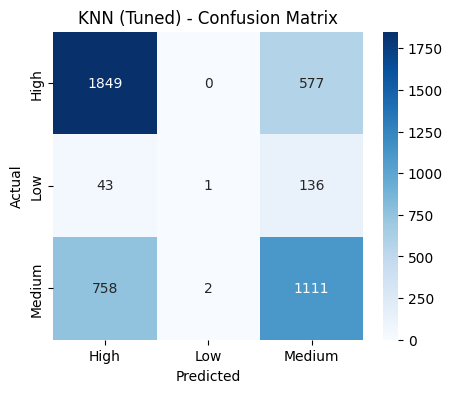

=== Decision Tree (Tuned) ===
Accuracy : 0.6698682153227608
Precision: 0.6397254305474677
Recall   : 0.6698682153227608
F1-score : 0.6533713687138847

Classification Report:
               precision    recall  f1-score   support

        High       0.70      0.78      0.74      2426
         Low       0.00      0.00      0.00       180
      Medium       0.62      0.59      0.60      1871

    accuracy                           0.67      4477
   macro avg       0.44      0.46      0.45      4477
weighted avg       0.64      0.67      0.65      4477



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



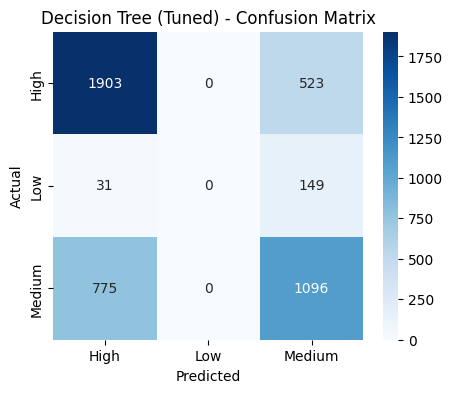

=== Random Forest (Tuned) ===
Accuracy : 0.6770158588340407
Precision: 0.6685551794642705
Recall   : 0.6770158588340407
F1-score : 0.6632132178166699

Classification Report:
               precision    recall  f1-score   support

        High       0.72      0.77      0.74      2426
         Low       0.50      0.02      0.03       180
      Medium       0.62      0.62      0.62      1871

    accuracy                           0.68      4477
   macro avg       0.61      0.47      0.47      4477
weighted avg       0.67      0.68      0.66      4477



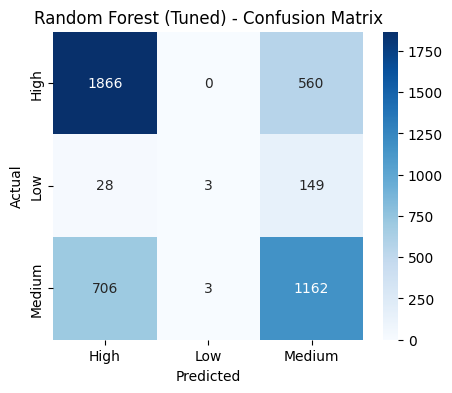

In [219]:
evaluate_model(knn_cv.best_estimator_, X_test, Y_test, "KNN (Tuned)")
evaluate_model(dt_cv.best_estimator_, X_test, Y_test, "Decision Tree (Tuned)")
evaluate_model(rf_cv.best_estimator_, X_test, Y_test, "Random Forest (Tuned)")



ROC Curve for best model: Random Forest

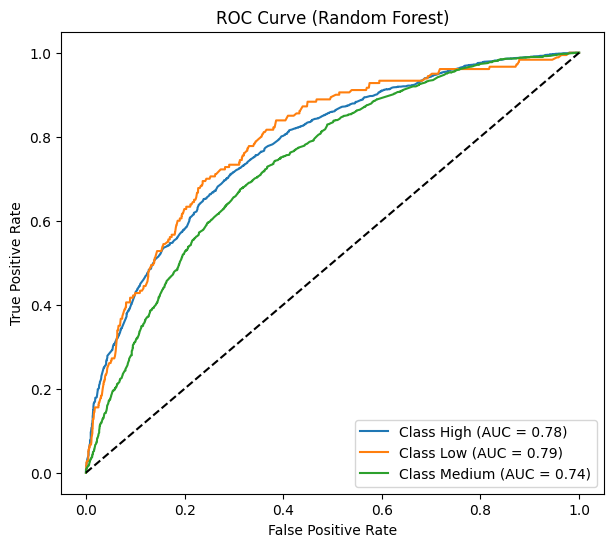

In [220]:
from sklearn.preprocessing import label_binarize
import numpy as np

# Binarize labels for ROC
classes = rf_cv.best_estimator_.classes_
Y_test_bin = label_binarize(Y_test, classes=classes)
Y_score = rf_cv.best_estimator_.predict_proba(X_test)

# Plot ROC curve for each class
plt.figure(figsize=(7,6))
for i, cls in enumerate(classes):
    fpr, tpr, _ = roc_curve(Y_test_bin[:, i], Y_score[:, i])
    plt.plot(fpr, tpr, label=f"Class {cls} (AUC = {auc(fpr, tpr):.2f})")

plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Random Forest)")
plt.legend()
plt.show()


# 8.Conclusion

Among the three classifiers tested — KNN, Decision Tree, and Random Forest — the Random Forest model performed the best overall. It achieved the highest accuracy and F1-score on the test set, showing stronger generalization ability compared to the other models. KNN was sensitive to the choice of neighbors and distance metric, and while Decision Tree captured important splits, it tended to overfit when left untuned. Random Forest, by aggregating multiple trees, balanced bias and variance effectively, making it the most reliable model for this dataset.